In [1]:
import os
import cv2
import json
import pandas as pd
import matplotlib.patches as patches
import torch as T

from matplotlib import pyplot as plt

from motion_capture.data.datasets import scale_points, center_bbox
from torch.utils import data
from torchvision.io import read_image
from torchvision.transforms.functional import resize, crop



%matplotlib inline

# WIDER Face

In [ ]:
from motion_capture.data.datasets import WIDERFaceDataset

number_of_faces = 10
image_shape = (448, 224)
wider_face_dataset = WIDERFaceDataset(
    output_image_shape_WH=image_shape, 
    max_number_of_faces=number_of_faces,
    train_path="//192.168.2.206/data/datasets/WIDER-Face/train",
    val_path="//192.168.2.206/data/datasets/WIDER-Face/val",
    center_bbox=True)

test_i = 11


In [ ]:
# face_counts = pd.Series([anot_dp["numberOfFaces"] for anot_dp in wider_face_dataset.annotation_datapoints]).value_counts()
# face_counts[:20].plot.bar()
# plt.title("number datapoints over number of faces")
# plt.show()

number of faces 1


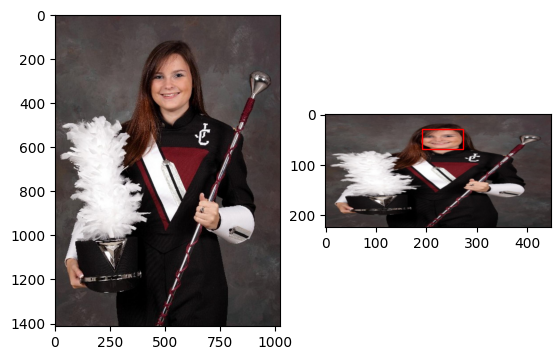

In [ ]:
original_image = cv2.cvtColor(cv2.imread(wider_face_dataset.annotation_datapoints[test_i]["imagePath"]), cv2.COLOR_BGR2RGB)
_, ax = plt.subplots(1, 2)

# plot original image
ax[0].imshow(original_image)

# plot image with bounding boxes
print(f"number of faces {wider_face_dataset.annotation_datapoints[test_i]['numberOfFaces']}")
test_image = wider_face_dataset[test_i]["image"].permute(1, 2, 0).round().byte().numpy()
faces = wider_face_dataset[test_i]["faceBbox"]
ax[1].imshow(test_image)

for i in range(faces.shape[0]):
    x, y = faces[i][0]
    w, h = faces[i][1]
    ax[1].add_patch(
        patches.Rectangle(
            (x-w, y-h), 
            w*2, h*2, 
            linewidth=1, 
            edgecolor="red", 
            facecolor="none"))

# plt.show()

---

# WFLW

In [4]:
from motion_capture.data.datasets import WFLWDataset

wflw_dataset = WFLWDataset(
    output_full_image_shape_WH=(448, 224),
    output_face_image_shape_WH=(224, 112),
    center_bbox=True,
    image_path="//192.168.2.206/data/datasets/WFLW/images",
    annotation_path="//192.168.2.206/data/datasets/WFLW/annotations")

test_i = 2

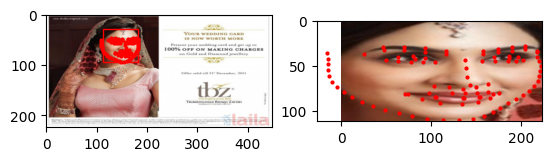

In [14]:
test_full_image = wflw_dataset[test_i]["fullImage"].permute(1, 2, 0).round().byte().numpy()
test_face_image = wflw_dataset[test_i]["faceImage"].permute(1, 2, 0).round().byte().numpy()

_, ax = plt.subplots(1, 2)

# plot full image, bounding box and keypoints
ax[0].imshow(test_full_image)

x, y = wflw_dataset[test_i]["faceBbox"][0]
w, h = wflw_dataset[test_i]["faceBbox"][1]
ax[0].add_patch(
    patches.Rectangle(
        (x-w, y-h), 
        w*2, h*2, 
        linewidth=1, 
        edgecolor="red", 
        facecolor="none"))

for dp in wflw_dataset[test_i]["globalKeypoints"]:
    ax[0].plot(dp[0], dp[1], "ro", markersize=2)

# plot face image and keypoints
ax[1].imshow(test_face_image)

for dp in wflw_dataset[test_i]["localKeypoints"]:
    ax[1].plot(dp[0], dp[1], "ro", markersize=2)


plt.show()

# COFW

In [5]:
from motion_capture.data.datasets import COFWColorDataset

cofw_color_dataset = COFWColorDataset(
    output_full_image_shape_WH=(448, 224),
    output_face_image_shape_WH=(224, 112),
    data_path="//192.168.2.206/data/datasets/COFW/")

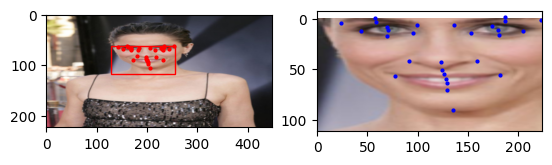

In [10]:
test_i = 3

test_full_image = cofw_color_dataset[test_i]["fullImage"].permute(1, 2, 0).round().byte().numpy()
test_face_image = cofw_color_dataset[test_i]["faceImage"].permute(1, 2, 0).round().byte().numpy()

_, ax = plt.subplots(1, 2)

# plot full image, bounding box and keypoints
ax[0].imshow(test_full_image)

x, y = cofw_color_dataset[test_i]["faceBbox"][0]
w, h = cofw_color_dataset[test_i]["faceBbox"][1]
ax[0].add_patch(
    patches.Rectangle(
        (x-w, y-h), 
        w*2, h*2, 
        linewidth=1, 
        edgecolor="red", 
        facecolor="none"))

for dp in cofw_color_dataset[test_i]["globalKeypoints"]:
    ax[0].plot(dp[0], dp[1], "ro", markersize=2)

# plot face image and keypoints
ax[1].imshow(test_face_image)

kpts = cofw_color_dataset[test_i]["localKeypoints"]
for i in range(kpts.shape[0]):
    if cofw_color_dataset[test_i]["keypointOcclusion"][i] == 1:
        ax[1].plot(kpts[i][0], kpts[i][1], "bo", markersize=2)
    else:
        ax[1].plot(kpts[i][0], kpts[i][1], "ro", markersize=2)

plt.show()

# MPII

In [2]:
from motion_capture.data.datasets import MPIIDataset

mpii_dataset = MPIIDataset(
    output_full_image_shape_WH=(448, 224),
    output_person_image_shape_WH=(224, 112),
    annotation_path="//192.168.2.206/data/datasets/MPII/annotations",
    image_folder_path="//192.168.2.206/data/datasets/MPII/images"
)


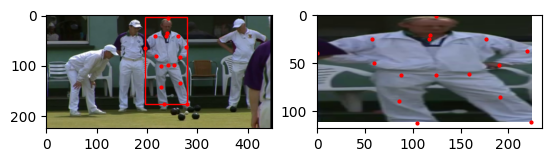

In [3]:
test_i = 110


_, ax = plt.subplots(1, 2)

# plot full image, keypoints, center and bounding box
ax[0].imshow(mpii_dataset[test_i]["fullImage"].permute(1,2,0).byte().numpy())

for dp in mpii_dataset[test_i]["globalKeypoints"]:
    ax[0].plot(dp[0], dp[1], "ro", markersize=2)

x, y = mpii_dataset[test_i]["personBbox"][0]
w, h = mpii_dataset[test_i]["personBbox"][1]
ax[0].add_patch(
    patches.Rectangle(
        (x-w, y-h), 
        w*2, h*2, 
        linewidth=1, 
        edgecolor="red", 
        facecolor="none"))

# plot person image and keypoints
ax[1].imshow(mpii_dataset[test_i]["personImage"].permute(1,2,0).byte().numpy())

for dp in mpii_dataset[test_i]["localKeypoints"]:
    ax[1].plot(dp[0], dp[1], "ro", markersize=2)

plt.show()

# COCO + Full body

In [2]:
class COCO2017CaptionsDataset(data.Dataset):
    
    def __init__(
        self,
        image_folder_path: str,
        annotation_folder_path: str):
        
        super().__init__()
        
        self.image_folder_path = image_folder_path
        self.annotation_path = annotation_folder_path
        
        with open(os.path.join(annotation_folder_path, "captions_train2017.json"), "r") as f:
            self.train_datapoints = json.load(f)
            
        with open(os.path.join(annotation_folder_path, "captions_val2017.json"), "r") as f:
            self.val_datapoints = json.load(f)
            
    def __len__(self):
        return len(self.all_datapoints)
    
    def __getitem__(self, idx):
        return self.all_datapoints[idx]
    
class COCO2017WholeBodyDataset(data.Dataset):
    
    def __init__(
        self,
        image_folder_path: str,
        annotation_folder_path: str):
        
        super().__init__()
        
        with open(os.path.join(annotation_folder_path, "coco_wholebody_train_v1.0.json"), "r") as f:
            self.train_datapoints = json.load(f)
        with open(os.path.join(annotation_folder_path, "coco_wholebody_val_v1.0.json"), "r") as f:
            self.val_datapoints = json.load(f)
            
    def __len__(self):
        return len(self.all_datapoints)
    
    def __getitem__(self, idx):
        return self.all_datapoints[idx]
    

class COCO2017InstancesDataset(data.Dataset):
    
    def __init__(
        self,
        image_folder_path: str,
        annotation_folder_path: str):
        
        super().__init__()
        
        with open(os.path.join(annotation_folder_path, "instances_train2017.json"), "r") as f:
            self.train_datapoints = json.load(f)
        with open(os.path.join(annotation_folder_path, "instances_val2017.json"), "r") as f:
            self.val_datapoints = json.load(f)
            
    def __len__(self):
        return len(self.all_datapoints)
    
    def __getitem__(self, idx):
        return self.all_datapoints[idx]

In [148]:
class COCO2017PersonKeypointsDataset(data.Dataset):
    
    def __init__(
        self,
        image_folder_path: str,
        annotation_folder_path: str,
        output_full_image_shape_WH: tuple,
        output_person_image_shape_WH: tuple,
        max_segmentation_points: int = 100,
        center_bbox: bool = True,
        filter_is_crowd: bool = True,
        load_val_only: bool = False):
        
        super().__init__()
        
        print("WARINIG: COCO2017PersonKeypointsDataset removes all entries with multiple segmentations")
        
        self.center_bbox = center_bbox
        self.output_full_image_shape = output_full_image_shape_WH
        self.output_person_image_shape = output_person_image_shape_WH
        
        self.max_segmentation_points = max_segmentation_points
        
        # get all datapoints
        images = []
        annotations = []
        if not load_val_only:
            with open(os.path.join(annotation_folder_path, "person_keypoints_train2017.json"), "r") as f:
                j = json.load(f)
                images.extend(j["images"])
                annotations.extend(j["annotations"])
        with open(os.path.join(annotation_folder_path, "person_keypoints_val2017.json"), "r") as f:
            j = json.load(f)
            images.extend(j["images"])
            annotations.extend(j["annotations"])
        
        # get all image_id : image_path pairs
        self.image_path_map = {}
        for image in images:
            self.image_path_map[image["id"]] = os.path.join(image_folder_path, image["file_name"])
        
        # gruop annotations by image_id
        image_annotation_map = {}
        for annotation in annotations:
            if annotation["image_id"] not in image_annotation_map:
                image_annotation_map[annotation["image_id"]] = []
            
            formatted_annotation = self.format_datapoint(annotation, filter_is_crowd)
            if formatted_annotation is not None:
                image_annotation_map[annotation["image_id"]].append(formatted_annotation)
        
        # annotations_by_image = pd.DataFrame(annotations).groupby("image_id").apply(lambda x: x.to_dict(orient="records")).to_list()
        
        self.all_datapoints = list(image_annotation_map.values())
        
    def __len__(self):
        return len(self.all_datapoints)
    
    def __getitem__(self, idx):
        image_datapoints = self.all_datapoints[idx]
        
        full_image = read_image(image_datapoints[0]["imagePath"])
        
        out = []
        for datapoint in image_datapoints:
            bbox = datapoint["bbox"]
            keypoints = datapoint["keypoints"]
            visibility = datapoint["keypointVisibility"]
            validity = datapoint["keypointValidity"]
            segmentation = datapoint["segmentation"]
            
            # padd segmentation to maxMsegmentation_points
            padding = T.zeros((self.max_segmentation_points - segmentation.shape[0], 2), dtype=T.int16)
            segmentation = T.cat([segmentation, padding], dim=0)
            
            # resize bbox, keypoints and segmentation to now full image
            full_scaled_bbox = scale_points(bbox, full_image.shape[::-1][:2], self.output_full_image_shape)
            full_scaled_keypoints = scale_points(keypoints, full_image.shape[::-1][:2], self.output_full_image_shape)
            full_scaled_segmentation = scale_points(segmentation, full_image.shape[::-1][:2], self.output_full_image_shape)
            
            if self.center_bbox:
                full_scaled_bbox = center_bbox(full_scaled_bbox)
            
            # crop person image and scale keypoints, and segmentation
            person_image = crop(full_image, bbox[0][1], bbox[0][0], bbox[1][1], bbox[1][0])
            local_scaled_keypoints = scale_points(keypoints - bbox[0], person_image.shape[::-1][:2], self.output_person_image_shape)
            local_scaled_segmentation = scale_points(segmentation - bbox[0], person_image.shape[::-1][:2], self.output_person_image_shape)
            
            # resize person image
            person_image = resize(person_image, self.output_person_image_shape[::-1])
            
            out.append({
                "personImage": person_image,
                "personBbox": full_scaled_bbox,
                "keypointVisibility": visibility,
                "keypointValidity": validity,
                "localKeypoints": local_scaled_keypoints,
                "globalKeypoints": full_scaled_keypoints,
                "localSegmentation": local_scaled_segmentation,
                "globalSegmentation": full_scaled_segmentation,
                # "category": T.tensor(datapoint["category"])
            })
        
        # resize full image
        full_image = resize(full_image, self.output_full_image_shape[::-1])
        
        # return concatenation of all datapoints
        return {
            "fullImage": full_image,
            "personImages": T.stack([dp["personImage"] for dp in out]),
            "personBboxes": T.stack([dp["personBbox"] for dp in out]),
            "keypointVisibility": T.stack([dp["keypointVisibility"] for dp in out]),
            "keypointValidity": T.stack([dp["keypointValidity"] for dp in out]),
            "localKeypoints": T.stack([dp["localKeypoints"] for dp in out]),
            "globalKeypoints": T.stack([dp["globalKeypoints"] for dp in out]),
            "localSegmentations": T.stack([dp["localSegmentation"] for dp in out]),
            "globalSegmentations": T.stack([dp["globalSegmentation"] for dp in out]),
        }
        
        
    
    def format_datapoint(self, datapoint, filter_is_crowd):
        
        if filter_is_crowd and datapoint["iscrowd"]:
            return None
        
        # remove etries with multiple segmentations
        if len(datapoint["segmentation"]) == 0 or len(datapoint["segmentation"]) > 1:
            return None
        
        segmentations = T.tensor(datapoint["segmentation"][0]).reshape(-1, 2)
        
        if segmentations.shape[0] > self.max_segmentation_points:
            return None
        
        keypoints = T.tensor(datapoint["keypoints"]).reshape(-1, 3)
        
        return {
            "imagePath": self.image_path_map[datapoint["image_id"]],
            "bbox": T.tensor(datapoint["bbox"], dtype=T.int16).reshape(2, 2),
            "keypoints": keypoints[:, :2],
            "keypointVisibility": keypoints[:, 2] == 2,
            "keypointValidity": keypoints[:, 2] > 0,
            "segmentation": segmentations,
            "category": datapoint["category_id"]
        }

In [149]:
coco_dataset = COCO2017PersonKeypointsDataset(
    image_folder_path="//192.168.2.206/data/datasets/COCO2017/images",
    annotation_folder_path="//192.168.2.206/data/datasets/COCO2017/annotations",
    output_full_image_shape_WH=(448, 224),
    output_person_image_shape_WH=(224, 112),
    load_val_only=True)


WARINIG: COCO2017PersonKeypointsDataset removes all entries with multiple segmentations


6


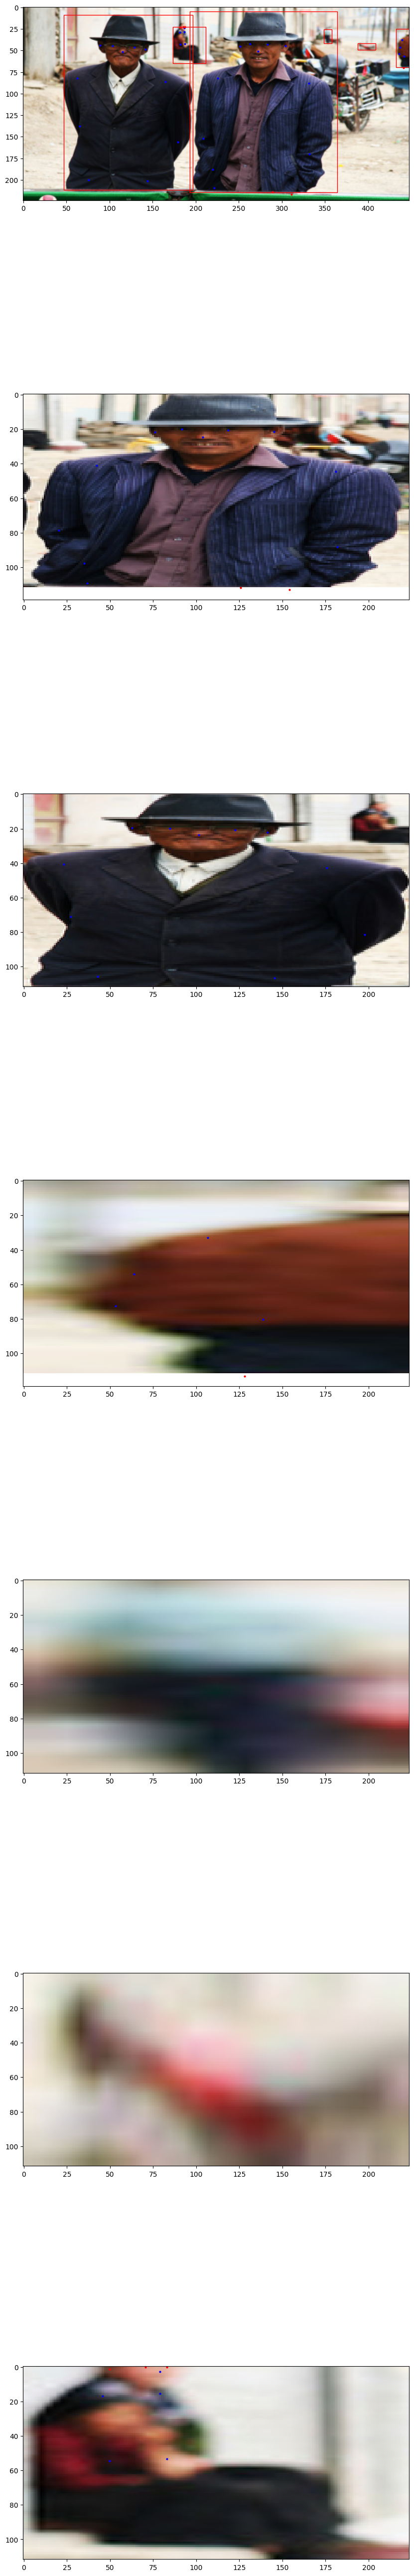

In [184]:
test_i = 3

full_image = coco_dataset[test_i]["fullImage"].permute(1, 2, 0).round().byte().numpy()

num_persons = coco_dataset[test_i]["personImages"].shape[0]

print(num_persons)

# create plot scale it to number of persons
fig, ax = plt.subplots(num_persons + 1)
fig.set_size_inches(10, 10 * (num_persons + 1))


ax[0].imshow(full_image)

for i in range(num_persons):
    
    # keypoints, bounding box and segmentation in full image
    kpts = coco_dataset[test_i]["globalKeypoints"][i]
    vis = coco_dataset[test_i]["keypointVisibility"][i]
    val = coco_dataset[test_i]["keypointValidity"][i]
    
    for j in range(kpts.shape[0]):
        if vis[j]:
            ax[0].plot(kpts[j][0], kpts[j][1], "bo", markersize=2)
        elif val[j]:
            ax[0].plot(kpts[j][0], kpts[j][1], "ro", markersize=2)
    
    x, y = coco_dataset[test_i]["personBboxes"][i][0]
    w, h = coco_dataset[test_i]["personBboxes"][i][1]
    ax[0].add_patch(
        patches.Rectangle(
            (x-w, y-h), 
            w*2, h*2, 
            linewidth=1, 
            edgecolor="red", 
            facecolor="none"))

    # plot individual person image and keypoints
    person_image = coco_dataset[test_i]["personImages"][i].permute(1, 2, 0).round().byte().numpy()
    ax[i+1].imshow(person_image)
    
    kpts = coco_dataset[test_i]["localKeypoints"][i]
    vis = coco_dataset[test_i]["keypointVisibility"][i]
    val = coco_dataset[test_i]["keypointValidity"][i]
    for j in range(kpts.shape[0]):
        if vis[j]:
            ax[i+1].plot(kpts[j][0], kpts[j][1], "bo", markersize=2)
        elif val[j]:
            ax[i+1].plot(kpts[j][0], kpts[j][1], "ro", markersize=2)

plt.show()


# HAKE Large

# hico_det

In [ ]:
# hd = scipy.io.loadmat("./../_data/_usefull/_images/Halpe-FullBody/hico_det/anno.mat")
# hd_bb = scipy.io.loadmat("./../_data/_usefull/_images/Halpe-FullBody/hico_det/anno_bbox.mat")

# """

# len(hd_bb["bbox_train"][0][i][1][0]) = 1

# len(hd_bb["bbox_train"][0][i][0]) = 1
# (name)


# """

In [ ]:
# hd_bb.keys()

In [ ]:
# print(len(hd["list_train"]), len(hd["list_test"]))

# hd_bb["bbox_train"][0][0][0]
# hd_bb["bbox_train"][0][0][1]

# for i in range(len(hd_bb["bbox_train"][0])):
#     image_name = hd_bb["bbox_train"][0][i][0][0]

#     width, height, depth = hd_bb["bbox_train"][0][i][1][0][0]
#     width, height, depth = width[0][0], height[0][0], depth[0][0]


# sum([len(hd_bb["bbox_train"][0][i][2][0]) for i in range(len(hd_bb["bbox_train"][0]))])

# [b[1] for b in hd_bb["bbox_train"][0][0][2][0]]




# RHDv2

In [ ]:
# arr = pickle.load(open("./../_data/_usefull/_images/RHD_published_v2/training/anno_training.pickle", "br"))

"""

arr[i]["xyz"] = xyz keypoints
arr[i]["uv_vis] = uv + visibility
arr[i]["K"] = camera
(i == image)


"""
None

# HAKE

In [ ]:
# hake_large_annotation = json.load(open("./../_data/_usefull/_images/HAKE/Annotations/hake_large_annotation.json", "r"))
# hico_det_training_set_instance_level = json.load(open("./../_data/_usefull/_images/HAKE/Annotations/hico-det-training-set-instance-level.json", "r"))
# hico_training_set_image_level = json.load(open("./../_data/_usefull/_images/HAKE/Annotations/hico-training-set-image-level.json", "r"))

"""

hico training set image level

{'arm_list': [0, 0, 0, 0, 1], 
'foot_list': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
'hand_list': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
'head_list': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
'hip_list': [1, 0, 0, 0, 0], 
'hoi_id': [153, 154, 155, 156], 
'leg_list': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
'parts_list': [1, 1, 1, 1, 1, 0, 1, 0, 0, 1]}


hico det training set instance level

{'dataset': 'hico-det', 
'labels': [
    {
        'action_labels': 
            [{'human_part': 6, 'partstate': 0}, 
            {'human_part': 9, 'partstate': 0}, 
            {'human_part': 4, 'partstate': 0}, 
            {'human_part': 0, 'partstate': 0}, 
            {'human_part': 3, 'partstate': 0}], 
        'height': 480, 
        'hoi_id': 153, 
        'human_bbox': [208, 33, 427, 300], 
        'object_bbox': [59, 98, 572, 405], 
        'width': 640
    }, 
    {
        'action_labels': 
            [{'human_part': 4, 'partstate': 0}, 
            {'human_part': 1, 'partstate': 6}, 
            {'human_part': 2, 'partstate': 6}], 
        'height': 480, 
        'hoi_id': 156, 
        'human_bbox': [209, 26, 444, 317], 
        'object_bbox': [59, 99, 579, 395], 
        'width': 640
    },
        ...], 
'path_prefix': 'hico_20160224_det/images/train2015'}



hake large annotation

{'dataset': 'hico-det', 
'labels': [
    {'action_labels': 
        [{'human_part': 6, 'partstate': 0}, {'human_part': 9, 'partstate': 0}, {'human_part': 4, 'partstate': 0}, {'human_part': 0, 'partstate': 0}, {'human_part': 3, 'partstate': 0}], 'height': 480, 'hoi_id': 153, 'human_bbox': [208, 33, 427, 300], 'object_bbox': [59, 98, 572, 405], 'width': 640}, 
    {'action_labels': 
        [{'human_part': 4, 'partstate': 0}, {'human_part': 1, 'partstate': 6}, {'human_part': 2, 'partstate': 6}], 'height': 480, 'hoi_id': 156, 'human_bbox': [209, 26, 444, 317], 'object_bbox': [59, 99, 579, 395], 'width': 640}, 
    {'action_labels': 
        [{'human_part': 6, 'partstate': 0}, {'human_part': 9, 'partstate': 0}, {'human_part': 4, 'partstate': 0}, {'human_part': 0, 'partstate': 0}, {'human_part': 3, 'partstate': 0}], 'height': 480, 'hoi_id': 154, 'human_bbox': [213, 20, 438, 357], 'object_bbox': [77, 115, 583, 396], 'width': 640}, {'action_labels': [{'human_part': 4, 'partstate': 0}], 'height': 480, 'hoi_id': 155, 'human_bbox': [206, 33, 427, 306], 'object_bbox': [61, 100, 571, 401], 'width': 640}], 
    ...
    
'path_prefix': 'hico_20160224_det/images/train2015'}


"""
None

# FreiHAND

In [ ]:
"""
training_K = json.load(open("./../_data/_usefull/FreiHAND/FreiHAND_pub_v2/training_K.json", "r"))
training_mano = json.load(open("./../_data/_usefull/FreiHAND/FreiHAND_pub_v2/training_mano.json", "r"))
training_scale = json.load(open("./../_data/_usefull/FreiHAND/FreiHAND_pub_v2/training_scale.json", "r"))
training_verts = json.load(open("./../_data/_usefull/FreiHAND/FreiHAND_pub_v2/training_verts.json", "r"))
training_xyz = json.load(open("./../_data/_usefull/FreiHAND/FreiHAND_pub_v2/training_xyz.json", "r"))

# length is the same for all = 32560 = number of greenscreened images

K = intrinsic camera matrix
mano = mano annotations ?
verts = 3d vertecies
xyz = 3d shape
"""

# Kinect

In [ ]:
# info = json.load(open("./../_data/_usefull/KinectDatasets/data/training/info.json", "r"))
# calib = json.load(open("./../_data/_usefull/KinectDatasets/data/training/calib.json", "r"))
# anno = json.load(open("./../_data/_usefull/KinectDatasets/data/training/anno.json", "r"))
# pred_sdk = json.load(open("./../_data/_usefull/KinectDatasets/data/training/pred_sdk.json", "r"))

# captury_info = json.load(open("./../_data/_usefull/KinectDatasets/data/captury_train/info.json", "r"))
# captury_calib = json.load(open("./../_data/_usefull/KinectDatasets/data/captury_train/calib.json", "r"))
# captury_anno = json.load(open("./../_data/_usefull/KinectDatasets/data/captury_train/anno.json", "r"))
# captury_pred_sdk = json.load(open("./../_data/_usefull/KinectDatasets/data/captury_train/pred_sdk.json", "r"))
# captury_pred_sdk_cap = json.load(open("./../_data/_usefull/KinectDatasets/data/captury_train/pred_sdk_cap.json", "r"))

"""
1920x1080

anno[0][0] = 18 kpts + vis

pred_sdk[0][i] = 25 kpts + vis (is a prediction)
(i == 4 for all)


captury_pred_sdk[0][i] = 25 kpts + vis
(i == 1 for all)

captury_pred_sdk_cap[0][i] = 25 kpts + vis
(i == 2 for all)


"""
None